# Parallel wine regression

In [2]:
# Activate inline plots.
%matplotlib inline

# Useful imports for the exercises.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

We are going to briefly revisit the dataset used for the "wine regression" exercise to show the built-in parallel processing capabilities of sklearn.

In [5]:
# Read the data and print some summary information.
df = pd.read_table('data/winequality-red.csv', sep=';')
# List of column names containing all the features for regression.
features = df.columns - ['quality']
# The name of the column for the output varaible.
target = 'quality'

In [6]:
from sklearn.cross_validation import train_test_split

x = df[features]
t = np.squeeze(df[target])

# Divide the data into a training and a test set.
random_state = 0  # Fixed so that everybody has got the same split
test_set_fraction = 0.2
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=test_set_fraction, 
                                                    random_state=random_state)

print 'Size of training set:', len(x_train)
print 'Size of test set:', len(x_test)


Size of training set: 1279
Size of test set: 320


We're going to set up two random forest regressors with a large number of estimators, with and without parallelization, and measure the time they need to fit they parameters.

In [18]:
from sklearn import ensemble
regr = ensemble.ExtraTreesRegressor(n_estimators=10000, max_depth=35)
regr_parallel = ensemble.ExtraTreesRegressor(n_estimators=10000, max_depth=35,
                                             n_jobs=8)

In [19]:
# First, without parallelization.
import time
start = time.time()
regr.fit(x_train, t_train)
print 'Time (s):', time.time() - start

Time (s): 29.1831421852


In [20]:
# Then, with parallelization (turn on activity monitor to see
# active cores).
start = time.time()
regr_parallel.fit(x_train, t_train)
print 'Time (s):', time.time() - start

Time (s): 12.0083200932


In [21]:
y_test = regr_parallel.predict(x_test)
print 'Training R^2 = {:.4f}'.format(regr_parallel.score(x_train, t_train))
print '    Test R^2 = {:.4f}'.format(regr_parallel.score(x_test, t_test))

Training R^2 = 1.0000
    Test R^2 = 0.4544


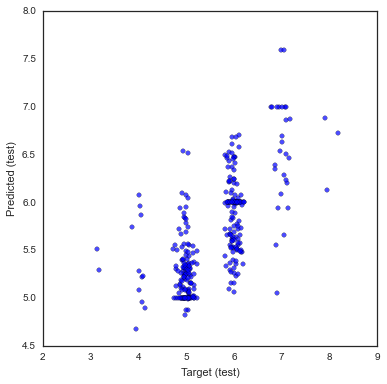

In [22]:
def plot_target_vs_prediction(t_test, y_test):
    x = t_test + np.random.randn(*t_test.shape) * 0.1
    plt.scatter(x, y_test, alpha=0.7)
    plt.xlabel('Target (test)')
    plt.ylabel('Predicted (test)')
    plt.gcf().set_size_inches(6, 6)

plot_target_vs_prediction(t_test, y_test)